**ASSIGNMENT 1**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mobiletest=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobiletest.csv')

In [ ]:
mobiletest.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [ ]:
X = mobiletest.drop('battery_power', axis=1)
y = mobiletest['battery_power']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.nunique(), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 721)               46865     
                                                                 
Total params: 52,369
Trainable params: 52,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 1s 15ms/step - loss: 6.6149 - accuracy: 0.0000e+00 - val_loss: 6.6500 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 6.4151 - accuracy: 0.0113 - val_loss: 6.7826 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 6.1481 - accuracy: 0.0188 - val_loss: 7.1486 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 5.7645 - accuracy: 0.0250 - val_loss: 7.7217 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 5.3079 - accuracy: 0.0475 - val_loss: 8.2946 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 4.7858 - accuracy: 0.0938 - val_loss: 8.9430 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 4.1920 - accuracy: 0.2438 - val_loss: 9.7276 - val_accuracy

In [ ]:
new_mobile_features = [4, 2000, 1, 2.0, 1, 8, 1, 32, 0.8, 145, 4, 1000, 700, 4096, 5, 3, 12, 1, 1, 1]

In [ ]:
new_mobile_features_scaled = scaler.transform([new_mobile_features])
prediction = model.predict(new_mobile_features_scaled)
predicted_ram_category = label_encoder.inverse_transform([np.argmax(prediction)])
print('Predicted Battery power Category:', predicted_ram_category)

1/1 [==============================] - 0s 97ms/step
Predicted Battery power Category: [1629]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
mobiletest.dropna(inplace=True)

In [ ]:
mobiletest.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mobiletest[['ram','int_memory']],mobiletest.id,test_size=0.2, random_state=25)

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['ram'] = X_train_scaled['ram'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['ram'] = X_test_scaled['ram'] / 100

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: -27965.7383 - accuracy: 0.0012 
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: -28664.6543 - accuracy: 0.0012
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: -29362.5879 - accuracy: 0.0012
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: -30062.2031 - accuracy: 0.0012
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: -30756.8008 - accuracy: 0.0012
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: -31452.3027 - accuracy: 0.0012
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: -32152.8555 - accuracy: 0.0012
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: -32848.8945 - accuracy: 0.0012
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: -33543.6953 - accuracy: 0.0012
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss:

In [ ]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 0s 3ms/step - loss: -58605.8438 - accuracy: 0.0000e+00


[-58605.84375, 0.0]

In [ ]:
model.predict(X_test_scaled)

7/7 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
y_test

688    689
49      50
288    289
698    699
775    776
      ... 
410    411
344    345
135    136
735    736
591    592
Name: id, Length: 200, dtype: int64

In [ ]:
coef, intercept = model.get_weights()

In [ ]:
coef, intercept

(array([[2.238096 ],
        [2.2382338]], dtype=float32),
 array([1.2444419], dtype=float32))

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
X_test

ram  int_memory
688  2310          12
49   2693          29
288  1335          37
698  2262          61
775  1435           2
..    ...         ...
410   600          64
344  3238          44
135  1500          10
735  1435          32
591  3131          38

[200 rows x 2 columns]

In [ ]:
def prediction_function(ram, int_memory):
    weighted_sum = coef[0]*ram + coef[1]*int_memory + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.989382534451442

In [ ]:
prediction_function(.18, 1)

0.9798763935006065

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [ ]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['ram'],X['int_memory'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self, X_test):
        weighted_sum = self.w1*X_test['ram'] + self.w2*X_test['int_memory'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, ram,int_memory, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(ram)
        for i in range(epochs):
            weighted_sum = w1 * ram + w2 *int_memory + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(ram),(y_predicted-y_true))
            w2d = (1/n)*np.dot(np.transpose(int_memory),(y_predicted-y_true))

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [ ]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:5314.311406730108, w2:8500.752505383338, bias:251.3831268256511, loss:-16397.73791296137
Epoch:0, w1:5314.311406730108, w2:8500.752505383338, bias:251.3831268256511, loss:-16397.73791296137
Final weights and bias: w1: 5314.311406730108, w2: 8500.752505383338, bias: 251.3831268256511


In [ ]:
coef, intercept

(array([[2.238096 ],
        [2.2382338]], dtype=float32),
 array([1.2444419], dtype=float32))

In [ ]:
X_test_scaled

ram  int_memory
688  23.10          12
49   26.93          29
288  13.35          37
698  22.62          61
775  14.35           2
..     ...         ...
410   6.00          64
344  32.38          44
135  15.00          10
735  14.35          32
591  31.31          38

[200 rows x 2 columns]

In [ ]:
customModel.predict(X_test_scaled)

688    1.0
49     1.0
288    1.0
698    1.0
775    1.0
      ... 
410    1.0
344    1.0
135    1.0
735    1.0
591    1.0
Length: 200, dtype: float64

In [ ]:
model.predict(X_test_scaled)

7/7 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 2ms/step - loss: -2325959.2500 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [ ]:
traindf= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mobiletrain.csv")

In [ ]:
X_label = traindf.iloc[:, :20]
Y_labels = traindf.iloc[:, 20]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_label, Y_labels, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=15, activation='sigmoid'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=70, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/70
32/32 [==============================] - 2s 9ms/step - loss: 1.4575 - accuracy: 0.2469 - val_loss: 1.4097 - val_accuracy: 0.2625
Epoch 2/70
32/32 [==============================] - 0s 3ms/step - loss: 1.4154 - accuracy: 0.2469 - val_loss: 1.3802 - val_accuracy: 0.2625
Epoch 3/70
32/32 [==============================] - 0s 4ms/step - loss: 1.3796 - accuracy: 0.2988 - val_loss: 1.3417 - val_accuracy: 0.4225
Epoch 4/70
32/32 [==============================] - 0s 3ms/step - loss: 1.3283 - accuracy: 0.4400 - val_loss: 1.2745 - val_accuracy: 0.5300
Epoch 5/70
32/32 [==============================] - 0s 4ms/step - loss: 1.2543 - accuracy: 0.4925 - val_loss: 1.1864 - val_accuracy: 0.5475
Epoch 6/70
32/32 [==============================] - 0s 4ms/step - loss: 1.1651 - accuracy: 0.5038 - val_loss: 1.0884 - val_accuracy: 0.5500
Epoch 7/70
32/32 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.5231 - val_loss: 1.0162 - val_accuracy: 0.5925
Epoch 8/70
32/32 [==

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

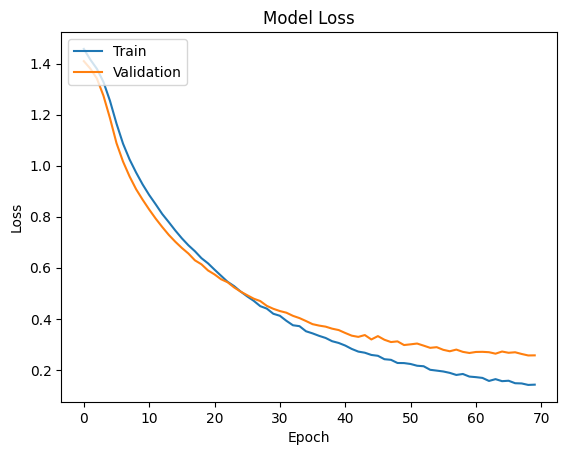

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mobiletest.csv")

In [ ]:
X_pred = test_dataset.iloc[:, 1:21]
X_pred = sc.transform(X_pred)

In [ ]:
y_pred_probs = model.predict(X_pred)
y_pred = [max(enumerate(pred), key=lambda x: x[1])[0] for pred in y_pred_probs]

32/32 [==============================] - 0s 1ms/step


**ASSIGNMENT 2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.6144 - accuracy: 0.7882 - val_loss: 0.4547 - val_accuracy: 0.8382
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4250 - accuracy: 0.8496 - val_loss: 0.4130 - val_accuracy: 0.8486
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3827 - accuracy: 0.8631 - val_loss: 0.3884 - val_accuracy: 0.8618
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3590 - accuracy: 0.8701 - val_loss: 0.3772 - val_accuracy: 0.8635
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3425 - accuracy: 0.8772 - val_loss: 0.3541 - val_accuracy: 0.8726
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3317 - accuracy: 0.8803 - val_loss: 0.3529 - val_accuracy: 0.8725
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3185 - accuracy: 0.8829 - val_loss: 0.3454 - val_accuracy: 0.8765
E

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.3298 - accuracy: 0.8818
Test accuracy: 0.8817999958992004


**ASSIGNMENT 3**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/penguins.csv')

In [ ]:
df.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [ ]:
df.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [ ]:
df.dropna(inplace=True)

In [ ]:
features = ['Flipper Length (mm)', 'Beak Length (mm)', 'Beak Width (mm)', 'Body Mass (g)']
target = 'Species'

In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'
actual_features = df.columns[3:7]  # Select columns 3 to 6 (excluding the first 3 columns)
if not set(features).issubset(actual_features):
    raise ValueError("Invalid feature names provided")

X = df[features]
y = df[target]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 [==============================] - 2s 29ms/step - loss: 320.0737 - accuracy: 0.3684 - val_loss: 94.1912 - val_accuracy: 0.4627
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 48.8451 - accuracy: 0.4248 - val_loss: 9.0833 - val_accuracy: 0.3731
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 14.2154 - accuracy: 0.4173 - val_loss: 17.8299 - val_accuracy: 0.2687
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 7.5623 - accuracy: 0.4398 - val_loss: 3.7335 - val_accuracy: 0.6119
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 2.8830 - accuracy: 0.6090 - val_loss: 1.5805 - val_accuracy: 0.5970
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 2.5507 - accuracy: 0.5752 - val_loss: 4.5867 - val_accuracy: 0.4776
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 2.3435 - accuracy: 0.5789 - val_loss: 3.1284 - val_accuracy: 0.6418
Epoch 8/50
17

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 6ms/step - loss: 1.7377 - accuracy: 0.6567
Test accuracy: 0.6567164063453674


**ASSIGNMENT 4**

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
X = dframe.iloc[:, :-1].values
y = dframe.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 3s 21ms/step - loss: 0.6740 - accuracy: 0.6074
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6405 - accuracy: 0.7025
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6102 - accuracy: 0.7314
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5815 - accuracy: 0.7603
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5527 - accuracy: 0.7686
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5234 - accuracy: 0.7975
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.8223
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8264
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4429 - accuracy: 0.8223
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8223
Epoch 11/50
8/8 [=====================

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 19ms/step - loss: 0.4041 - accuracy: 0.8689
Accuracy: 0.868852436542511
